# Cognitive Lab

## 1. Libraries and Parameters

Firstly, we need to import our necessary libraries and parameters which we will use. In this case it will be TensorFlow with some initial parameters we will use for the optimiser.

In [1]:
# Import Libraries
import keras
from keras.datasets import cifar10
from keras import utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
from keras import regularizers
from keras.optimizers.legacy import SGD, Adam, RMSprop
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Init Params
batch_size = 128
num_classes = 10
epochs = 30
verbose = 1
validation_split = 0.2
optim = RMSprop()

## 2. Data Handling

We will now load in the CIFAR-10 dataset and preprocess it so that it is ready to be used.

In [3]:
# Load CIFAR-10 Dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

# Convert to Categorical
output_Y_train = utils.to_categorical(output_y_train, num_classes)
output_Y_test = utils.to_categorical(output_y_test, num_classes)

# Float and Normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

170498071/170498071 [==============================] - 11s 0us/step
input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## 3. Model

We now need to define the base initial model.

In [4]:
def cnn4():
  # Define Network
  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  # Compile Model
  model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
  return model

# Output Summary
model = cnn4()

In [5]:
# Train
history = model.fit(input_X_train, output_Y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split,  verbose=verbose)

Epoch 1/30
313/313 [==============================] - 10s 17ms/step - loss: 1.8059 - accuracy: 0.3449 - val_loss: 1.4790 - val_accuracy: 0.4639
Epoch 2/30
313/313 [==============================] - 4s 14ms/step - loss: 1.4056 - accuracy: 0.4970 - val_loss: 1.3548 - val_accuracy: 0.5323
Epoch 3/30
313/313 [==============================] - 4s 14ms/step - loss: 1.2260 - accuracy: 0.5631 - val_loss: 1.1697 - val_accuracy: 0.5820
Epoch 4/30
313/313 [==============================] - 4s 14ms/step - loss: 1.1009 - accuracy: 0.6158 - val_loss: 1.0208 - val_accuracy: 0.6422
Epoch 5/30
313/313 [==============================] - 4s 14ms/step - loss: 0.9968 - accuracy: 0.6524 - val_loss: 0.8989 - val_accuracy: 0.6898
Epoch 6/30
313/313 [==============================] - 4s 14ms/step - loss: 0.9093 - accuracy: 0.6815 - val_loss: 0.8586 - val_accuracy: 0.6995
Epoch 7/30
313/313 [==============================] - 4s 14ms/step - loss: 0.8540 - accuracy: 0.7057 - val_loss: 0.7990 - val_accuracy: 0.725

79/79 [==============================] - 0s 4ms/step - loss: 0.9942 - accuracy: 0.7674

Test score/loss: 0.9941920638084412
Test accuracy: 0.7674000263214111
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


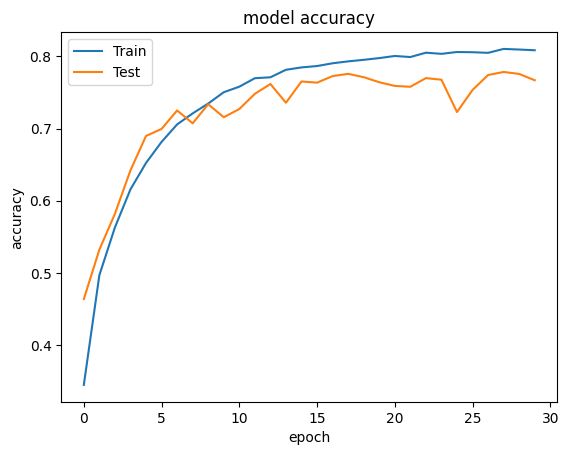

In [6]:
# Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=batch_size, verbose=verbose)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# List All Data in History
print(history.history.keys())

# Summarize History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 4. Tune Hyperparameters

### Modify Layers

**Two Layers**

Epoch 1/30
313/313 [==============================] - 4s 12ms/step - loss: 1.6274 - accuracy: 0.4223 - val_loss: 1.4157 - val_accuracy: 0.5018
Epoch 2/30
313/313 [==============================] - 3s 11ms/step - loss: 1.2209 - accuracy: 0.5691 - val_loss: 1.1009 - val_accuracy: 0.6198
Epoch 3/30
313/313 [==============================] - 3s 11ms/step - loss: 1.0533 - accuracy: 0.6291 - val_loss: 1.0858 - val_accuracy: 0.6258
Epoch 4/30
313/313 [==============================] - 3s 11ms/step - loss: 0.9434 - accuracy: 0.6695 - val_loss: 1.0062 - val_accuracy: 0.6547
Epoch 5/30
313/313 [==============================] - 3s 11ms/step - loss: 0.8531 - accuracy: 0.7021 - val_loss: 0.9109 - val_accuracy: 0.6819
Epoch 6/30
313/313 [==============================] - 3s 11ms/step - loss: 0.7782 - accuracy: 0.7309 - val_loss: 0.9567 - val_accuracy: 0.6774
Epoch 7/30
313/313 [==============================] - 3s 11ms/step - loss: 0.7027 - accuracy: 0.7551 - val_loss: 0.8975 - val_accuracy: 0.6999

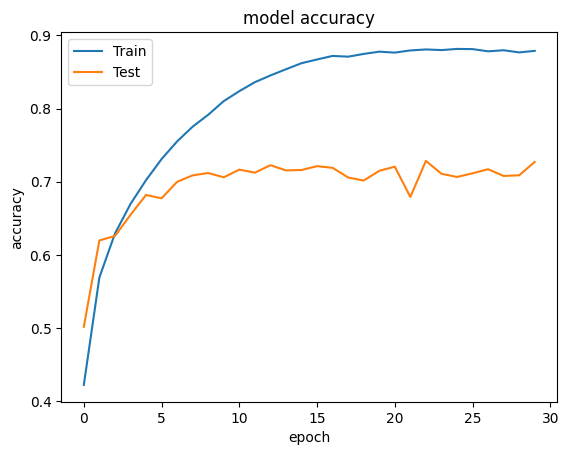

In [7]:
def cnn2():
  # Define Network
  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  # Compile Model
  model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
  return model

model = cnn2()

# Train
history = model.fit(input_X_train, output_Y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split, verbose=verbose)

# Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=batch_size, verbose=verbose)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# List All Data in History
print(history.history.keys())

# Summarize History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Three Layers**

Epoch 1/30
313/313 [==============================] - 5s 12ms/step - loss: 1.7856 - accuracy: 0.3507 - val_loss: 1.5340 - val_accuracy: 0.4491
Epoch 2/30
313/313 [==============================] - 3s 10ms/step - loss: 1.4330 - accuracy: 0.4901 - val_loss: 1.3911 - val_accuracy: 0.4907
Epoch 3/30
313/313 [==============================] - 3s 10ms/step - loss: 1.2732 - accuracy: 0.5491 - val_loss: 1.1806 - val_accuracy: 0.5842
Epoch 4/30
313/313 [==============================] - 3s 10ms/step - loss: 1.1552 - accuracy: 0.5935 - val_loss: 1.2412 - val_accuracy: 0.5659
Epoch 5/30
313/313 [==============================] - 3s 10ms/step - loss: 1.0734 - accuracy: 0.6251 - val_loss: 1.0358 - val_accuracy: 0.6427
Epoch 6/30
313/313 [==============================] - 3s 10ms/step - loss: 1.0106 - accuracy: 0.6453 - val_loss: 0.9306 - val_accuracy: 0.6782
Epoch 7/30
313/313 [==============================] - 3s 10ms/step - loss: 0.9562 - accuracy: 0.6665 - val_loss: 0.8882 - val_accuracy: 0.6938

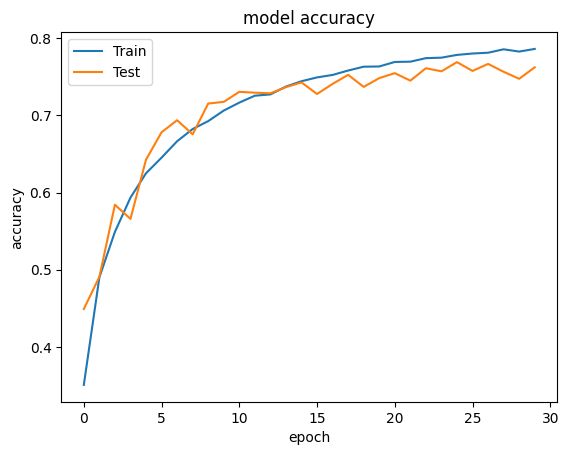

In [8]:
def cnn3():
  # Define Network
  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  # Compile Model
  model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
  return model

model = cnn3()

# Train
history = model.fit(input_X_train, output_Y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split, verbose=verbose)

# Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=batch_size, verbose=verbose)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# List All Data in History
print(history.history.keys())

# Summarize History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Five Layers**

Epoch 1/30
313/313 [==============================] - 6s 17ms/step - loss: 1.8834 - accuracy: 0.3150 - val_loss: 1.5297 - val_accuracy: 0.4322
Epoch 2/30
313/313 [==============================] - 5s 15ms/step - loss: 1.4520 - accuracy: 0.4822 - val_loss: 1.3401 - val_accuracy: 0.5096
Epoch 3/30
313/313 [==============================] - 5s 15ms/step - loss: 1.2523 - accuracy: 0.5567 - val_loss: 1.0913 - val_accuracy: 0.6174
Epoch 4/30
313/313 [==============================] - 5s 15ms/step - loss: 1.1206 - accuracy: 0.6049 - val_loss: 1.1069 - val_accuracy: 0.6097
Epoch 5/30
313/313 [==============================] - 5s 15ms/step - loss: 1.0191 - accuracy: 0.6416 - val_loss: 1.0078 - val_accuracy: 0.6499
Epoch 6/30
313/313 [==============================] - 5s 15ms/step - loss: 0.9319 - accuracy: 0.6717 - val_loss: 1.0311 - val_accuracy: 0.6374
Epoch 7/30
313/313 [==============================] - 5s 15ms/step - loss: 0.8687 - accuracy: 0.6968 - val_loss: 0.9652 - val_accuracy: 0.6712

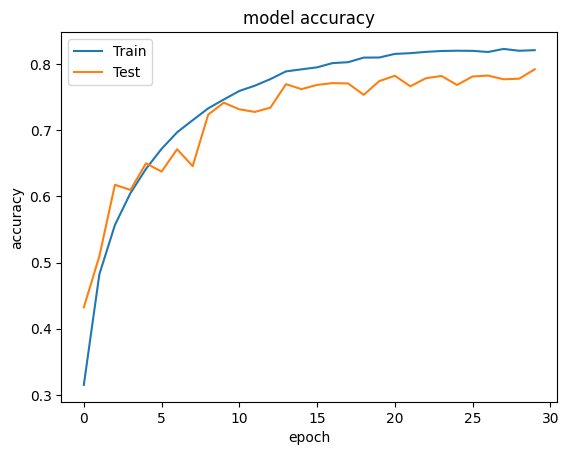

In [9]:
def cnn5():
  # Define Network
  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  # Compile Model
  model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
  return model

model = cnn5()

# Train
history = model.fit(input_X_train, output_Y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split, verbose=verbose)

# Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=batch_size, verbose=verbose)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# List All Data in History
print(history.history.keys())

# Summarize History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Regularisation

**0.0001**

Epoch 1/30
313/313 [==============================] - 8s 22ms/step - loss: 1.7861 - accuracy: 0.3578 - val_loss: 1.5111 - val_accuracy: 0.4674
Epoch 2/30
313/313 [==============================] - 6s 19ms/step - loss: 1.3125 - accuracy: 0.5390 - val_loss: 1.2536 - val_accuracy: 0.5542
Epoch 3/30
313/313 [==============================] - 6s 19ms/step - loss: 1.0829 - accuracy: 0.6278 - val_loss: 1.0239 - val_accuracy: 0.6591
Epoch 4/30
313/313 [==============================] - 6s 19ms/step - loss: 0.9480 - accuracy: 0.6771 - val_loss: 0.8408 - val_accuracy: 0.7196
Epoch 5/30
313/313 [==============================] - 6s 19ms/step - loss: 0.8461 - accuracy: 0.7117 - val_loss: 0.8643 - val_accuracy: 0.7151
Epoch 6/30
313/313 [==============================] - 6s 19ms/step - loss: 0.7764 - accuracy: 0.7394 - val_loss: 0.7916 - val_accuracy: 0.7410
Epoch 7/30
313/313 [==============================] - 6s 19ms/step - loss: 0.7149 - accuracy: 0.7633 - val_loss: 0.8304 - val_accuracy: 0.7195

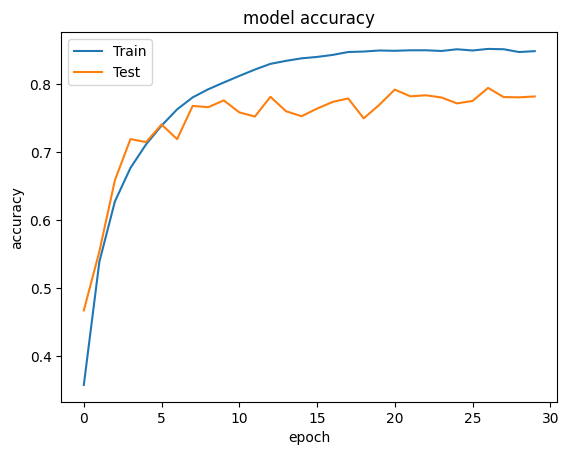

In [10]:
def cnn4_reg(val):
  # Define Network
  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_X_train.shape[1:], kernel_regularizer=regularizers.l2(val)))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(val)))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(val)))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(val)))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(LeakyReLU(alpha=.001))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  # Compile Model
  model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
  return model

model = cnn4_reg(1e-4)

# Train
history = model.fit(input_X_train, output_Y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split, verbose=verbose)

# Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=batch_size, verbose=verbose)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# List All Data in History
print(history.history.keys())

# Summarize History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**0.001**

Epoch 1/30
313/313 [==============================] - 7s 21ms/step - loss: 1.8972 - accuracy: 0.3443 - val_loss: 1.4718 - val_accuracy: 0.5010
Epoch 2/30
313/313 [==============================] - 6s 19ms/step - loss: 1.4227 - accuracy: 0.5176 - val_loss: 1.2536 - val_accuracy: 0.5837
Epoch 3/30
313/313 [==============================] - 6s 19ms/step - loss: 1.2204 - accuracy: 0.5953 - val_loss: 1.1684 - val_accuracy: 0.6170
Epoch 4/30
313/313 [==============================] - 6s 19ms/step - loss: 1.1081 - accuracy: 0.6396 - val_loss: 1.0026 - val_accuracy: 0.6790
Epoch 5/30
313/313 [==============================] - 6s 19ms/step - loss: 1.0126 - accuracy: 0.6745 - val_loss: 0.9358 - val_accuracy: 0.7041
Epoch 6/30
313/313 [==============================] - 6s 19ms/step - loss: 0.9439 - accuracy: 0.6991 - val_loss: 0.9312 - val_accuracy: 0.7088
Epoch 7/30
313/313 [==============================] - 6s 19ms/step - loss: 0.8924 - accuracy: 0.7205 - val_loss: 0.9283 - val_accuracy: 0.7135

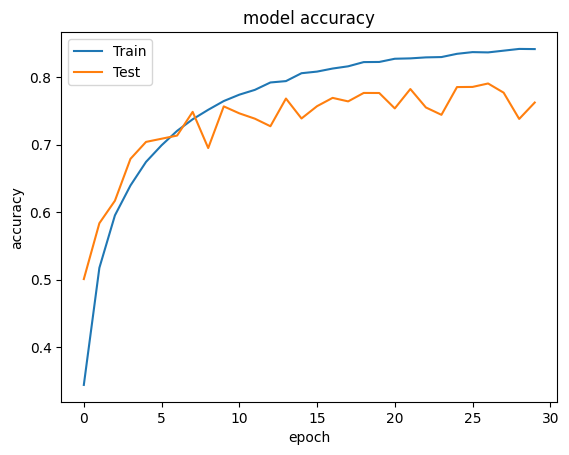

In [11]:
model = cnn4_reg(0.001)

# Train
history = model.fit(input_X_train, output_Y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split, verbose=verbose)

# Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=batch_size, verbose=verbose)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# List All Data in History
print(history.history.keys())

# Summarize History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**0.01**

Epoch 1/30
313/313 [==============================] - 7s 21ms/step - loss: 2.1655 - accuracy: 0.3034 - val_loss: 1.7420 - val_accuracy: 0.4040
Epoch 2/30
313/313 [==============================] - 6s 19ms/step - loss: 1.7099 - accuracy: 0.4275 - val_loss: 1.5223 - val_accuracy: 0.4873
Epoch 3/30
313/313 [==============================] - 6s 19ms/step - loss: 1.5546 - accuracy: 0.4850 - val_loss: 1.4993 - val_accuracy: 0.5043
Epoch 4/30
313/313 [==============================] - 6s 19ms/step - loss: 1.4447 - accuracy: 0.5286 - val_loss: 1.3206 - val_accuracy: 0.5708
Epoch 5/30
313/313 [==============================] - 6s 19ms/step - loss: 1.3705 - accuracy: 0.5603 - val_loss: 1.2919 - val_accuracy: 0.5889
Epoch 6/30
313/313 [==============================] - 6s 19ms/step - loss: 1.3194 - accuracy: 0.5788 - val_loss: 1.2414 - val_accuracy: 0.6015
Epoch 7/30
313/313 [==============================] - 6s 19ms/step - loss: 1.2760 - accuracy: 0.5967 - val_loss: 1.3882 - val_accuracy: 0.5529

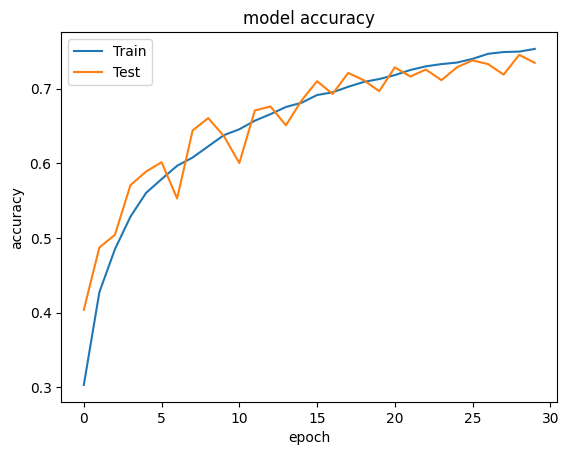

In [12]:
model = cnn4_reg(0.01)

# Train
history = model.fit(input_X_train, output_Y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split, verbose=verbose)

# Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=batch_size, verbose=verbose)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# List All Data in History
print(history.history.keys())

# Summarize History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()